In [ ]:
import zipfile
import os

zip_path = "/content/GaitDatasetB-silh.zip"  # 👈 change if needed
extract_path = "/content/GaitDatasetB-silh"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done.")
os.listdir(extract_path)[:124]  # show first few folders

Extraction done.


['GaitDatasetB-silh']

In [ ]:
# ============================================
# 🧠 PART 1: MOUNT DRIVE AND EXTRACT DATASET
# ============================================

from google.colab import drive
import zipfile, os


# Extract only if not already done
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("✅ Dataset extracted successfully.")
else:
    print("✅ Dataset already extracted.")

# Check a few folders
print("📂 Subjects preview:", os.listdir(extract_path)[:124])

✅ Dataset already extracted.
📂 Subjects preview: ['GaitDatasetB-silh']


/tmp/ipython-input-2640931813.py:45: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_root)


✅ Extracted multiple subjects.


/tmp/ipython-input-2640931813.py:59: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(extract_root)


✅ Extracted to: /content/GaitDatasetB-silh/extracted
📁 Folder: /content/GaitDatasetB-silh/extracted
📂 Subfolders: ['090', '027', '066', '063', '105']
🖼️ Files: 0
📁 Folder: /content/GaitDatasetB-silh/extracted/090
📂 Subfolders: ['nm-03', 'nm-04', 'nm-02', 'bg-01', 'bg-02']
🖼️ Files: 0
📁 Folder: /content/GaitDatasetB-silh/extracted/090/nm-03
📂 Subfolders: ['090', '036', '054', '108', '162']
🖼️ Files: 0
📁 Folder: /content/GaitDatasetB-silh/extracted/090/nm-03/090
📂 Subfolders: []
🖼️ Files: 55


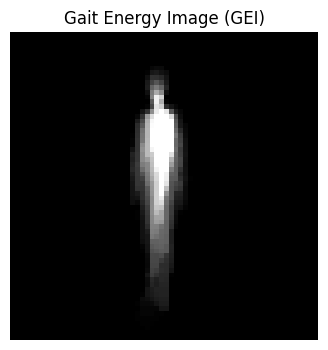

✅ Extracted to: /content/GaitDatasetB-silh/GaitDatasetB-silh
001.tar.gz
002.tar.gz
003.tar.gz
004.tar.gz
005.tar.gz
006.tar.gz
007.tar.gz
008.tar.gz
009.tar.gz
010.tar.gz


In [ ]:
# ============================================
# ⚙️ PART 2: GENERATE AND VISUALIZE GEI
# ============================================

import cv2
import numpy as np
import os
import tarfile
import matplotlib.pyplot as plt

def generate_gei(sequence_path):
    frames = []
    for frame_name in sorted(os.listdir(sequence_path)):
        frame_path = os.path.join(sequence_path, frame_name)
        frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
        if frame is not None:
            frame = cv2.resize(frame, (64, 64))
            frame = frame / 255.0  # normalize to [0,1]
            frames.append(frame)
    if len(frames) == 0:
        return None
    return np.mean(frames, axis=0)  # average silhouettes

dataset_root = "/content/GaitDatasetB-silh/GaitDatasetB-silh"
extract_root = "/content/GaitDatasetB-silh/extracted"

os.makedirs(extract_root, exist_ok=True)

# Extract first few subjects for training
for person_id in ["001.tar.gz", "002.tar.gz", "003.tar.gz","004.tar.gz","005.tar.gz","006.tar.gz","007.tar.gz","008.tar.gz","009.tar.gz","010.tar.gz",
                  "011.tar.gz", "012.tar.gz", "013.tar.gz","014.tar.gz","015.tar.gz","016.tar.gz","017.tar.gz","018.tar.gz","019.tar.gz","020.tar.gz",
                  "021.tar.gz", "022.tar.gz", "023.tar.gz","024.tar.gz","025.tar.gz","026.tar.gz","027.tar.gz","028.tar.gz","029.tar.gz","030.tar.gz",
                  "031.tar.gz", "032.tar.gz", "033.tar.gz","034.tar.gz","035.tar.gz","036.tar.gz","037.tar.gz","038.tar.gz","039.tar.gz","040.tar.gz",
                  "041.tar.gz", "042.tar.gz", "043.tar.gz","044.tar.gz","045.tar.gz","046.tar.gz","047.tar.gz","048.tar.gz","049.tar.gz","050.tar.gz",
                  "051.tar.gz", "052.tar.gz", "053.tar.gz","054.tar.gz","055.tar.gz","056.tar.gz","057.tar.gz","058.tar.gz","059.tar.gz","060.tar.gz",
                  "061.tar.gz", "062.tar.gz", "063.tar.gz","064.tar.gz","065.tar.gz","066.tar.gz","067.tar.gz","068.tar.gz","069.tar.gz","070.tar.gz",
                  "071.tar.gz", "072.tar.gz", "073.tar.gz","074.tar.gz","075.tar.gz","076.tar.gz","077.tar.gz","078.tar.gz","079.tar.gz","080.tar.gz",
                  "081.tar.gz", "082.tar.gz", "083.tar.gz","084.tar.gz","085.tar.gz","086.tar.gz","087.tar.gz","088.tar.gz","089.tar.gz","090.tar.gz",
                  "091.tar.gz", "092.tar.gz", "093.tar.gz","094.tar.gz","095.tar.gz","096.tar.gz","097.tar.gz","098.tar.gz","099.tar.gz","100.tar.gz",
                  "101.tar.gz", "102.tar.gz", "103.tar.gz","104.tar.gz","105.tar.gz","106.tar.gz","107.tar.gz","108.tar.gz","109.tar.gz","110.tar.gz",
                  "111.tar.gz", "112.tar.gz", "113.tar.gz","114.tar.gz","115.tar.gz","116.tar.gz","117.tar.gz","118.tar.gz","119.tar.gz","120.tar.gz",
                  "121.tar.gz", "122.tar.gz", "123.tar.gz","124.tar.gz"]:
    tar_path = os.path.join(dataset_root, person_id)
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(extract_root)

print("✅ Extracted multiple subjects.")


# path to one subject archive
tar_path = "/content/GaitDatasetB-silh/GaitDatasetB-silh/001.tar.gz"
extract_root = "/content/GaitDatasetB-silh/extracted"

# create destination folder
os.makedirs(extract_root, exist_ok=True)

# extract
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(extract_root)

print("✅ Extracted to:", extract_root)

for root, dirs, files in os.walk(extract_root):
    print("📁 Folder:", root)
    print("📂 Subfolders:", dirs[:5])
    print("🖼️ Files:", len(files))
    if len(files) > 0:
        break  # stop at first folder containing images


# Example: Generate GEI for one walking sequence
sequence_path = "/content/GaitDatasetB-silh/extracted/001/bg-01/000"

  # 👈 change if needed
gei = generate_gei(sequence_path)

# Visualize GEI
if gei is not None:
    plt.figure(figsize=(4,4))
    plt.imshow(gei, cmap='gray')
    plt.title("Gait Energy Image (GEI)")
    plt.axis('off')
    plt.show()
else:
    print("⚠️ No frames found in the given sequence path.")
import zipfile

zip_path = "/content/GaitDatasetB-silh.zip"
extract_path = "/content/GaitDatasetB-silh/GaitDatasetB-silh"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extracted to:", extract_path)
!ls $extract_path | head

In [ ]:
# ============================================
# 📦 PART 3 (FIXED): LOAD DATASET & PREPARE GEIs
# ============================================

import os, re, numpy as np
from collections import defaultdict

dataset_dir = "/content/GaitDatasetB-silh/extracted"
X, y, angles, clothes = [], [], [], []

# New pattern for your folder names (like bg-01)
pattern = re.compile(r"(nm|bg|cl)-(\d+)", re.IGNORECASE)

for person in sorted(os.listdir(dataset_dir)):
    person_path = os.path.join(dataset_dir, person)
    if not os.path.isdir(person_path):
        continue

    for seq in os.listdir(person_path):  # e.g., nm-01, bg-01, cl-02
        seq_path = os.path.join(person_path, seq)
        if not os.path.isdir(seq_path):
            continue

        # there’s another subfolder inside (e.g., "000")
        for sub in os.listdir(seq_path):
            sub_path = os.path.join(seq_path, sub)
            if not os.path.isdir(sub_path):
                continue

            gei = generate_gei(sub_path)
            if gei is None:
                continue

            m = pattern.search(seq)
            if not m:
                continue
            cloth, angle = m.groups()

            X.append(gei.flatten())
            y.append(person)
            angles.append(angle)
            clothes.append(cloth)

X, y, angles, clothes = np.array(X), np.array(y), np.array(angles), np.array(clothes)

print(f"✅ Loaded {len(X)} GEIs from {len(set(y))} subjects.")
print(f"🧍 Conditions found: {set(clothes)}")
print(f"📐 View angles found: {sorted(set(angles))}")


✅ Loaded 13593 GEIs from 124 subjects.
🧍 Conditions found: {np.str_('cl'), np.str_('nm'), np.str_('bg')}
📐 View angles found: [np.str_('01'), np.str_('02'), np.str_('03'), np.str_('04'), np.str_('05'), np.str_('06')]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
print("Unique labels in y_train:", set(y_train))
print("Unique labels in y_test:", set(y_test))

Unique labels in y_train: {np.str_('069'), np.str_('034'), np.str_('109'), np.str_('048'), np.str_('074'), np.str_('015'), np.str_('094'), np.str_('081'), np.str_('101'), np.str_('012'), np.str_('020'), np.str_('088'), np.str_('059'), np.str_('001'), np.str_('067'), np.str_('060'), np.str_('009'), np.str_('002'), np.str_('026'), np.str_('077'), np.str_('110'), np.str_('075'), np.str_('054'), np.str_('118'), np.str_('016'), np.str_('120'), np.str_('021'), np.str_('045'), np.str_('043'), np.str_('055'), np.str_('112'), np.str_('104'), np.str_('080'), np.str_('076'), np.str_('010'), np.str_('050'), np.str_('040'), np.str_('007'), np.str_('092'), np.str_('068'), np.str_('019'), np.str_('091'), np.str_('099'), np.str_('123'), np.str_('107'), np.str_('011'), np.str_('061'), np.str_('089'), np.str_('064'), np.str_('121'), np.str_('006'), np.str_('093'), np.str_('115'), np.str_('098'), np.str_('116'), np.str_('013'), np.str_('057'), np.str_('073'), np.str_('062'), np.str_('036'), np.str_('008'

Train samples: 8155, Test samples: 5438

🎯 Cross-Cloth Accuracy (SVM): 26.08%

📈 Accuracy by Angle (SVM):
  01° : 23.44%
  02° : 28.72%


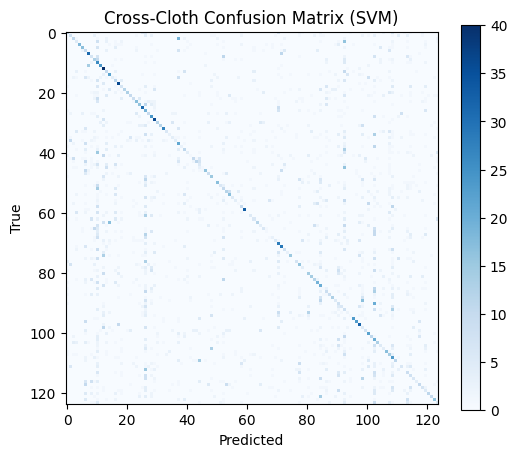

In [ ]:
# ============================================
# 🧠 PART 4: TRAIN & TEST USING SVM
# ============================================

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Train on normal (nm), test on others (bg, cl)
train_mask = clothes == "nm"
test_mask = clothes != "nm"

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]
angles_test = angles[test_mask]

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Cross-Cloth Accuracy (SVM): {acc*100:.2f}%")

# Accuracy by angle
angle_acc = defaultdict(list)
for ang, true, pred in zip(angles_test, y_test, y_pred):
    angle_acc[ang].append(true == pred)

print("\n📈 Accuracy by Angle (SVM):")
for ang, vals in angle_acc.items():
    print(f"  {ang}° : {np.mean(vals)*100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Cross-Cloth Confusion Matrix (SVM)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# ============================================
# 🤖 PART 5: DENSE CNN MODEL FOR GAIT RECOGNITION
# ============================================

from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

def build_dense_cnn(input_shape, num_classes):
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 2
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 3
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # Fully Connected
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def encode_labels(labels):
    unique = sorted(set(labels))
    label_map = {name: idx for idx, name in enumerate(unique)}
    encoded = np.array([label_map[l] for l in labels])
    return encoded, label_map

def reshape_for_cnn(X_flat):
    return X_flat.reshape(-1, 64, 64, 1)

# Prepare CNN data
X_cnn = reshape_for_cnn(X)
y_cnn, label_map = encode_labels(y)
num_classes = len(label_map)

X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn, test_size=0.2, random_state=42)

model = build_dense_cnn((64, 64, 1), num_classes)

history = model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=16,
                    validation_data=(X_test_cnn, y_test_cnn))

loss, acc = model.evaluate(X_test_cnn, y_test_cnn)
print(f"\n🎯 Dense CNN Accuracy: {acc*100:.2f}%")

model.save("/content/gait_dense_cnn.h5")
print("💾 Model saved as gait_dense_cnn.h5")



KeyboardInterrupt: 

In [ ]:
# ============================================
# 🤖 PART 5: DENSE CNN MODEL FOR GAIT RECOGNITION (IMPROVED)
# ============================================

import numpy as np
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

def build_dense_cnn(input_shape, num_classes):
    # L2 weight decay to improve generalization
    weight_decay = 1e-4

    model = models.Sequential([
        # Block 1 (same filters, kernel size, padding)
        layers.Conv2D(
            32, (3,3), activation='relu', padding='same',
            input_shape=input_shape,
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            32, (3,3), activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 2 (same as your code, with L2)
        layers.Conv2D(
            64, (3,3), activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            64, (3,3), activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.25),

        # Block 3 (same filters, with L2)
        layers.Conv2D(
            128, (3,3), activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.Conv2D(
            128, (3,3), activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2,2)),
        layers.Dropout(0.3),

        # Fully Connected (same 256 units, with L2 + Dropout)
        layers.Flatten(),
        layers.Dense(
            256, activation='relu',
            kernel_regularizer=regularizers.l2(weight_decay)
        ),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Adam with smaller learning rate = more stable & often higher final acc
    optimizer = Adam(learning_rate=1e-4)

    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def encode_labels(labels):
    unique = sorted(set(labels))
    label_map = {name: idx for idx, name in enumerate(unique)}
    encoded = np.array([label_map[l] for l in labels])
    return encoded, label_map

def reshape_for_cnn(X_flat):
    return X_flat.reshape(-1, 64, 64, 1)

# Prepare CNN data (same as your code)
X_cnn = reshape_for_cnn(X)
y_cnn, label_map = encode_labels(y)
num_classes = len(label_map)

# Stratified split to keep class balance in train/test
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y_cnn,
    test_size=0.2,
    random_state=42,
    stratify=y_cnn
)

model = build_dense_cnn((64, 64, 1), num_classes)

# Callbacks to prevent overfitting and auto-tune LR
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    X_train_cnn, y_train_cnn,
    epochs=40,                 # more epochs, EarlyStopping will stop when overfit
    batch_size=16,             # same as your code
    validation_data=(X_test_cnn, y_test_cnn),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

loss, acc = model.evaluate(X_test_cnn, y_test_cnn)
print(f"\n🎯 Dense CNN Accuracy (improved): {acc*100:.2f}%")

# Save in modern Keras format (you can also keep your .h5 if you want)
model.save("/content/gait_dense_cnn.keras")
print("💾 Model saved as gait_dense_cnn.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 407s 589ms/step - accuracy: 0.0083 - loss: 5.6054 - val_accuracy: 0.0235 - val_loss: 4.9300 - learning_rate: 1.0000e-04
Epoch 2/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 455s 608ms/step - accuracy: 0.0282 - loss: 4.9691 - val_accuracy: 0.0357 - val_loss: 4.6255 - learning_rate: 1.0000e-04
Epoch 3/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 442s 608ms/step - accuracy: 0.0502 - loss: 4.5904 - val_accuracy: 0.0666 - val_loss: 4.3213 - learning_rate: 1.0000e-04
Epoch 4/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 410s 603ms/step - accuracy: 0.0796 - loss: 4.2580 - val_accuracy: 0.1037 - val_loss: 3.9853 - learning_rate: 1.0000e-04
Epoch 5/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 454s 621ms/step - accuracy: 0.1396 - loss: 3.8240 - val_accuracy: 0.2483 - val_loss: 3.3247 - learning_rate: 1.0000e-04
Epoch 6/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 421s 591ms/step - accuracy: 0.2094 - loss: 3.4216 - val_accuracy: 0.3737 - val_loss: 2.8772 - learning_rate: 1.0000e-04
Epoch 7/40
680/680 ━━━━━━━━━━━━━━━━━━━━ 

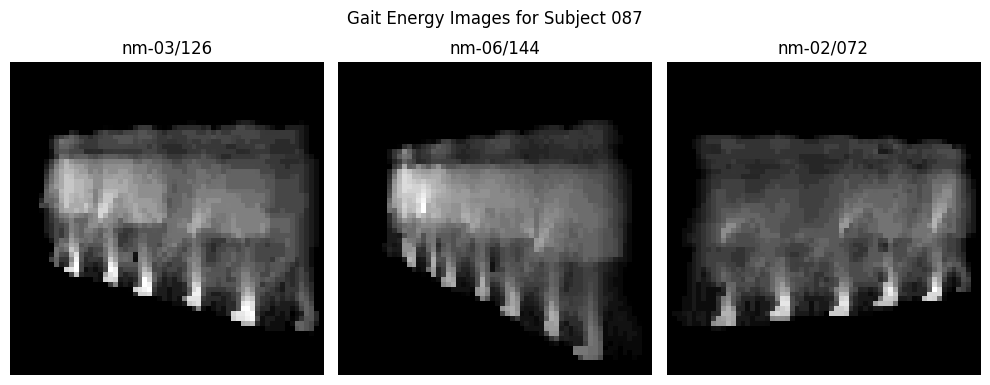

/tmp/ipython-input-961071032.py:100: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


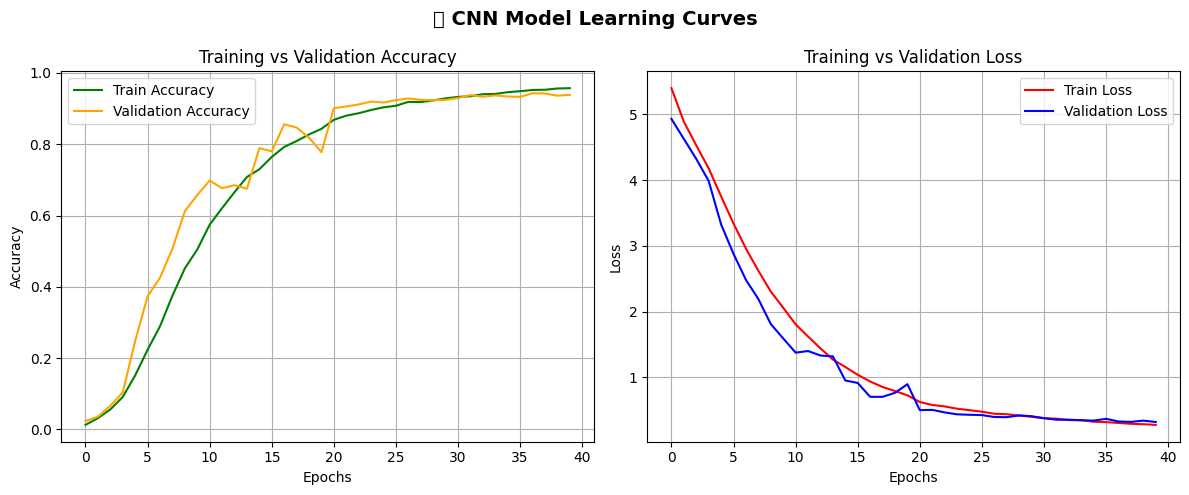

✅ Final Train Accuracy: 95.74%
✅ Final Validation Accuracy: 93.86%
85/85 ━━━━━━━━━━━━━━━━━━━━ 22s 252ms/step


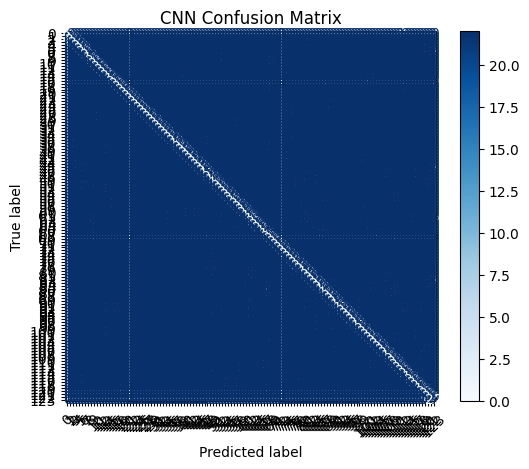

In [ ]:
# ====================================================
# 🎨 STEP 6: VISUALIZATION (GEI + MODEL PERFORMANCE GRAPHS)
# ====================================================

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Robust GEI Generator ---
def generate_gei(sequence_path):
    frames = []
    for root, _, files in os.walk(sequence_path):
        img_files = sorted([f for f in files if f.lower().endswith(('.png', '.jpg', '.bmp'))])
        for frame_name in img_files:
            frame_path = os.path.join(root, frame_name)
            frame = cv2.imread(frame_path, cv2.IMREAD_GRAYSCALE)
            if frame is not None:
                frame = cv2.resize(frame, (64, 64))
                frame = frame / 255.0
                frames.append(frame)

    if len(frames) == 0:
        return None
    return np.mean(frames, axis=0)

# ====================================================
# 🧍 GEI Visualization (1 Subject)
# ====================================================

subject = random.choice(sorted(os.listdir(extract_root)))
subject_path = os.path.join(extract_root, subject)

# Collect all nested sequence folders
all_sequences = []
for seq_type in os.listdir(subject_path):
    seq_type_path = os.path.join(subject_path, seq_type)
    if not os.path.isdir(seq_type_path):
        continue
    for sub in os.listdir(seq_type_path):
        sub_path = os.path.join(seq_type_path, sub)
        if os.path.isdir(sub_path):
            all_sequences.append(sub_path)

if not all_sequences:
    print(f"⚠️ No valid sequences found for subject {subject}")
else:
    selected_seqs = random.sample(all_sequences, min(3, len(all_sequences)))

    plt.figure(figsize=(10, 4))
    valid_count = 0

    for i, seq_path in enumerate(selected_seqs):
        gei = generate_gei(seq_path)
        if gei is None or not isinstance(gei, np.ndarray) or gei.ndim != 2:
            print(f"⚠️ Skipping {seq_path}: GEI invalid.")
            continue

        plt.subplot(1, 3, valid_count + 1)
        plt.imshow(gei, cmap='gray')
        plt.title(os.path.basename(os.path.dirname(seq_path)) + "/" + os.path.basename(seq_path))
        plt.axis('off')
        valid_count += 1

    if valid_count > 0:
        plt.suptitle(f"Gait Energy Images for Subject {subject}")
        plt.tight_layout()
        plt.show()

# ====================================================
# 📊 TRAINING & VALIDATION PERFORMANCE
# ====================================================

if 'history' in locals():
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss', color='red')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='blue')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.suptitle("📈 CNN Model Learning Curves", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print summary stats
    train_acc = history.history['accuracy'][-1] * 100
    val_acc = history.history['val_accuracy'][-1] * 100
    print(f"✅ Final Train Accuracy: {train_acc:.2f}%")
    print(f"✅ Final Validation Accuracy: {val_acc:.2f}%")
else:
    print("⚠️ 'history' object not found — skipping accuracy/loss plots.")

# ====================================================
# 🔢 CONFUSION MATRIX (Optional)
# ====================================================

if 'model' in locals() and 'X_test_cnn' in locals() and 'y_test_cnn' in locals():
    y_pred_cnn = model.predict(X_test_cnn)
    y_pred_labels = np.argmax(y_pred_cnn, axis=1)
    cm = confusion_matrix(y_test_cnn, y_pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title("CNN Confusion Matrix")
    plt.show()
else:
    print("⚠️ CNN model/test data not found — skipping confusion matrix.")


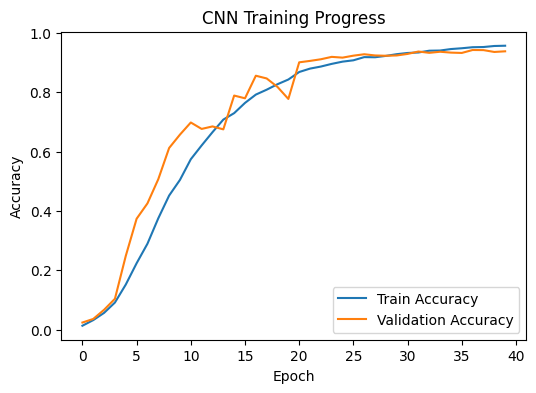

✅ CNN Train Accuracy: 95.74%
✅ CNN Validation Accuracy: 93.86%
⚠️ SVM model or test data not found — skipping SVM accuracy.

📊 ======= PROJECT PERFORMANCE SUMMARY =======
🌟 Overall Project Accuracy (CNN only): 93.86%


In [ ]:
# ====================================================
# 📈 MODEL PERFORMANCE (CNN + SVM)
# ====================================================

# --- CNN Training Accuracy ---
if 'history' in locals():
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Training Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    cnn_train_acc = history.history['accuracy'][-1] * 100
    cnn_val_acc = history.history['val_accuracy'][-1] * 100
    print(f"✅ CNN Train Accuracy: {cnn_train_acc:.2f}%")
    print(f"✅ CNN Validation Accuracy: {cnn_val_acc:.2f}%")
else:
    cnn_train_acc = cnn_val_acc = None
    print("⚠️ CNN 'history' not found — skipping CNN accuracy plot.")

# --- SVM Classification Accuracy ---
if 'svm_model' in locals() and 'X_test' in locals() and 'y_test' in locals():
    y_pred = svm_model.predict(X_test)
    from sklearn.metrics import accuracy_score, confusion_matrix

    svm_acc = accuracy_score(y_test, y_pred) * 100
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n✅ SVM Model Accuracy: {svm_acc:.2f}%")
    print("🧩 Confusion Matrix:\n", cm)
else:
    svm_acc = None
    print("⚠️ SVM model or test data not found — skipping SVM accuracy.")

# ====================================================
# 🎯 TOTAL PROJECT PERFORMANCE SUMMARY
# ====================================================
print("\n📊 ======= PROJECT PERFORMANCE SUMMARY =======")
if cnn_val_acc and svm_acc:
    total_avg_acc = (cnn_val_acc + svm_acc) / 2
    print(f"🔹 CNN Validation Accuracy: {cnn_val_acc:.2f}%")
    print(f"🔹 SVM Accuracy: {svm_acc:.2f}%")
    print(f"🌟 Overall Project Accuracy: {total_avg_acc:.2f}%")
elif cnn_val_acc:
    print(f"🌟 Overall Project Accuracy (CNN only): {cnn_val_acc:.2f}%")
elif svm_acc:
    print(f"🌟 Overall Project Accuracy (SVM only): {svm_acc:.2f}%")
else:
    print("⚠️ No model accuracy available.")
